## 1)Load the packages

In [9]:
import numpy as np
import pandas as pd
import itertools
from random import random
import matplotlib.pyplot as plt
import seaborn as sns
from ema_workbench import (MultiprocessingEvaluator, 
                           Scenario, Constraint, Policy,
                           ScalarOutcome)
from ema_workbench.em_framework.optimization import EpsilonProgress, HyperVolume
from ema_workbench.em_framework.evaluators import (perform_experiments, optimize,
                                                   BaseEvaluator)
from ema_workbench.util import ema_logging, save_results, load_results
from ema_workbench.analysis import (pairs_plotting, prim, 
                                    feature_scoring, parcoords,
                                    dimensional_stacking)

from problem_formulation import get_model_for_problem_formulation
%matplotlib inline

ema_logging.log_to_stderr(ema_logging.INFO)

BaseEvaluator.reporting_frequency = 0.01

## 2) Load results

In [3]:
results = load_results('MOROsolutions_disaggregatedOverLocation.tar.gz')
experiment,_ = results
results_df = pd.DataFrame.from_dict(_) 


[MainProcess/INFO] results loaded succesfully from C:\Users\user\EPA1361\fin_ass\MORO_policy_analysis\MOROsolutions_disaggregatedOverLocation.tar.gz


## 3)Parallel coordinate plot

In [11]:
results_df['name'] = experiment['policy']
num_each_pol = 250
df1 = results_df
for i in range(0,8*num_each_pol):
    df1.iloc[i] = results_df.iloc[4*i]
df2 =df1.iloc[0:8*num_each_pol]

0
1
2
3
4
5
6
7


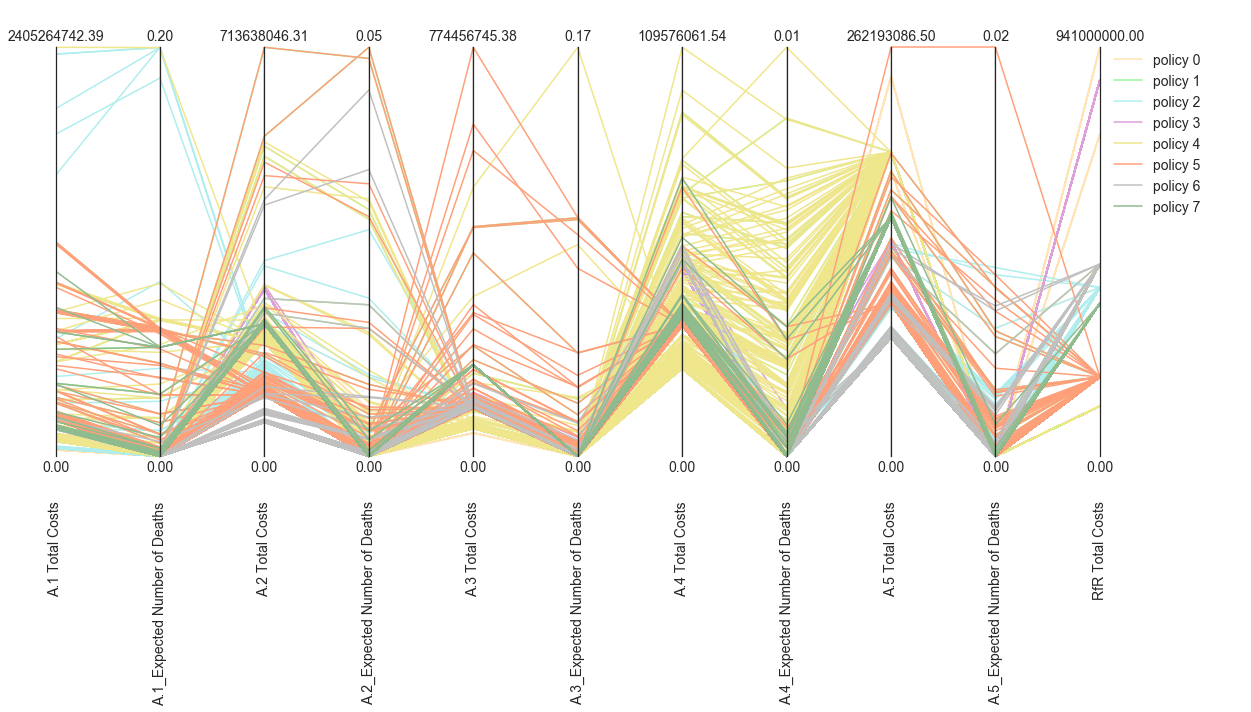

In [54]:
limits = pd.DataFrame([[0,0,0,0,0,0,0,0,0,0,0],df2.max().tolist()[0:11]], columns=results_df.columns[0:11])
axes = parcoords.ParallelAxes(limits)


#colors = ['chartreuse','darkgoldenrod','darkmagenta','crimson','yellow','moccasin','slategrey','teal']
colors = ['moccasin','palegreen','paleturquoise','plum','khaki','lightsalmon','silver','darkseagreen']
for i in range(0,8):
    outcomes = df2.iloc[(i*num_each_pol):((i*num_each_pol)+num_each_pol),0:11]
    axes.plot(outcomes,color=colors[i],label='policy {}'.format(i))
axes.fig.set_size_inches(15,10)
axes.legend()
plt.show()

## 2) Box Plot

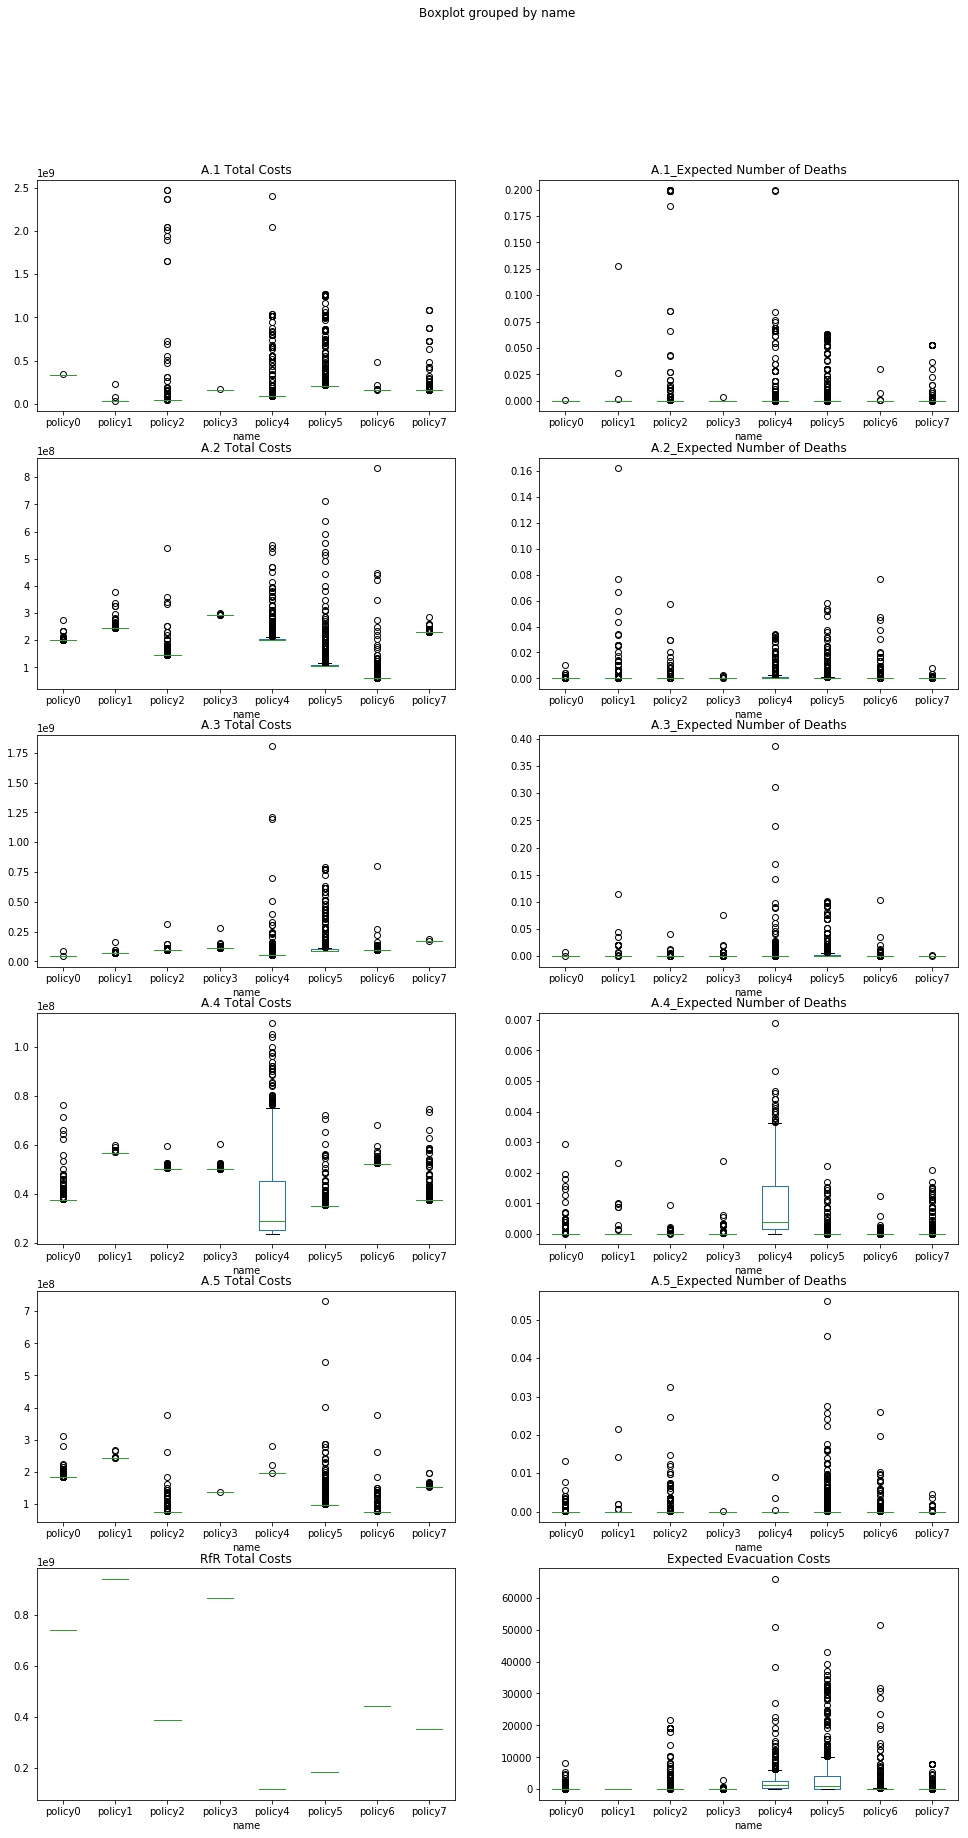

In [73]:
col = 2
row = 6
fig,ax = plt.subplots(row,col,figsize=(8*col,5*row))
location = list(itertools.product(range(row),range(col)))
fig.suptitle('Boxplots for each objective')
for i in range (0,len(results_df.columns)-1):
    locat = location[i]
    results_df.boxplot(column=[results_df.columns[i]],by='name',ax = ax[locat],grid=False)

## 3)Pairplot for cost at each location

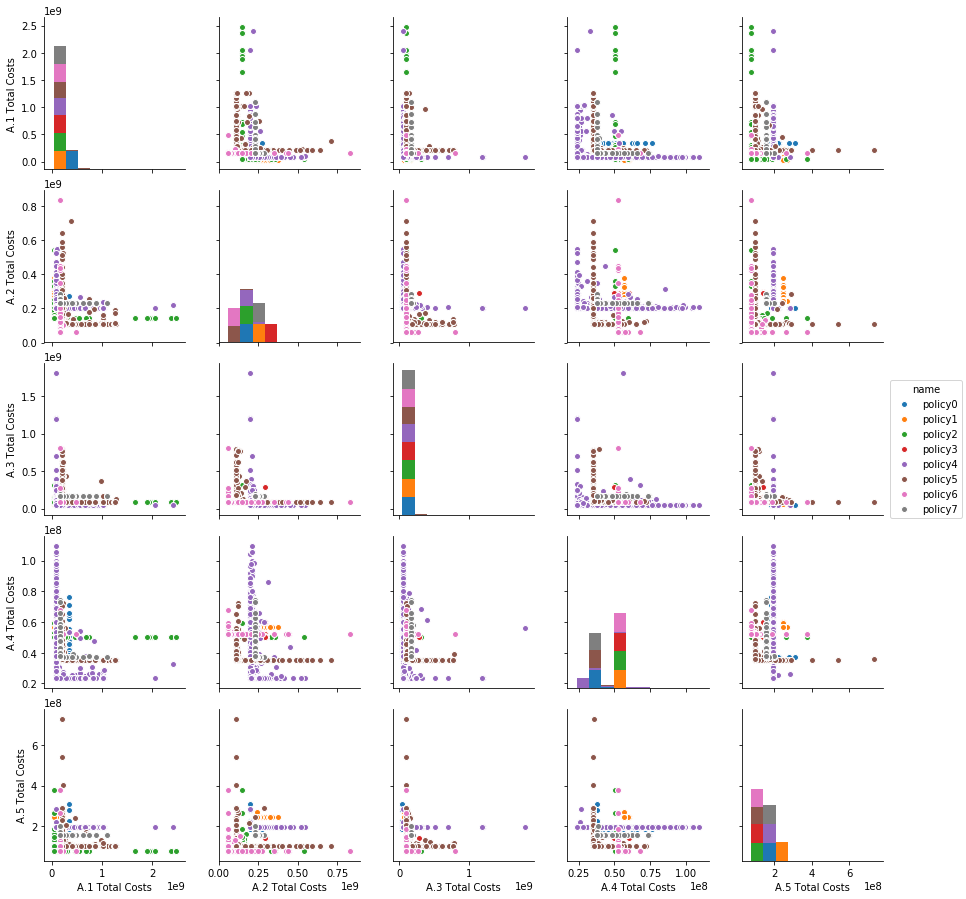

In [80]:
costs = results_df[['A.1 Total Costs','A.2 Total Costs','A.3 Total Costs','A.4 Total Costs','A.5 Total Costs','name']]
sns.pairplot(costs,hue='name')

## 4) Pairplot for Deaths at each location

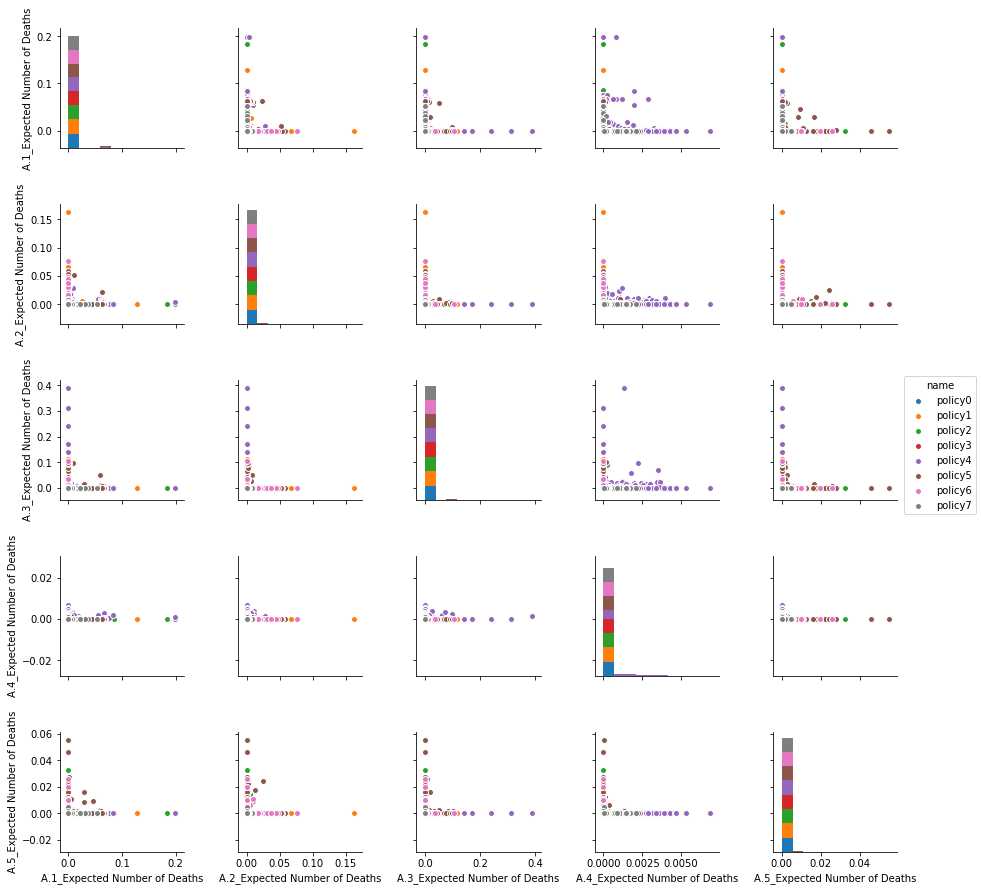

In [83]:
costs = results_df[['A.1_Expected Number of Deaths','A.2_Expected Number of Deaths','A.3_Expected Number of Deaths','A.4_Expected Number of Deaths','A.5_Expected Number of Deaths','name']]
sns.pairplot(costs,hue='name')

## 5)Subspace partitioning

In [87]:
def success(df):
    for i in range (0,len(df)):
        df.loc[i,'success']=  int(round(random()))


In [88]:
success(results_df)

In [90]:
experiment['success'] = results_df['success']
diff_policies = {}
for i in range (0,len(experiment['policy'].unique())):
    df = experiment[experiment['policy']== experiment['policy'].unique()[i]]
    string = 'policy' + str(i)
    diff_policies[string] = df

In [95]:
#0:19
def prim_analysis(dict_pol):
    for key in dict_pol:
        df_prim = dict_pol[key]
        x = df_prim.ix[:,0:19]
        y = df_prim['success']
        y = y.values
        prim_alg = prim.Prim(x, y, threshold=0.7, peel_alpha=0.1)
        box1 = prim_alg.find_box()
        box1.show_tradeoff()
        plt.show()
        box1.inspect(style='graph')
        plt.show()
        box1.show_pairs_scatter()
        fig = plt.gcf()
        fig.set_size_inches(12,12)
        plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
[MainProcess/INFO] 1000 points remaining, containing 517 cases of interest
[MainProcess/INFO] mean: 0.8428571428571429, mass: 0.07, coverage: 0.11411992263056092, density: 0.8428571428571429 restricted_dimensions: 9


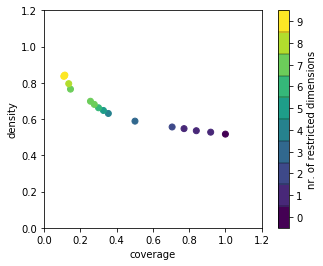

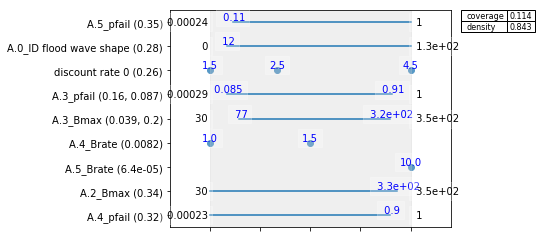

A.4_Brate [1.0, 1.5, 10.0]
A.5_Brate [10.0, 1.5, 1.0]
discount rate 0 [1.5, 2.5, 4.5, 3.5]


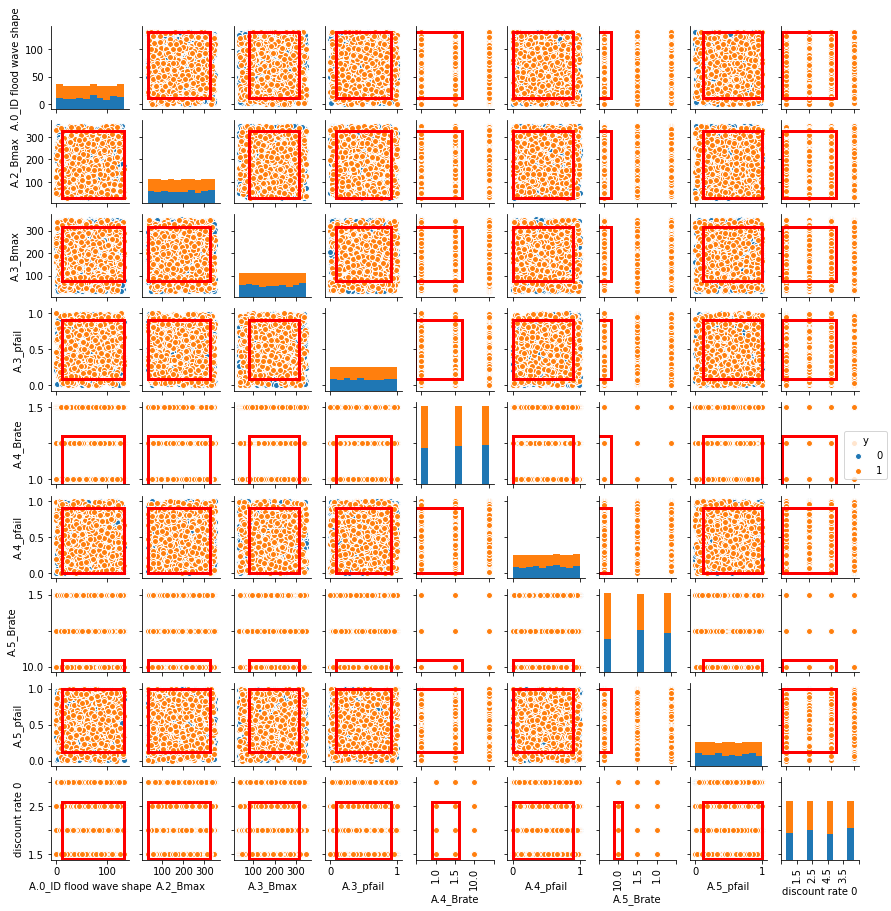

[MainProcess/INFO] 1000 points remaining, containing 486 cases of interest
[MainProcess/INFO] mean: 0.8679245283018868, mass: 0.053, coverage: 0.09465020576131687, density: 0.8679245283018868 restricted_dimensions: 12


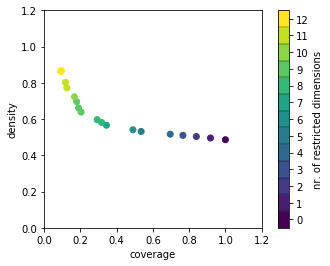

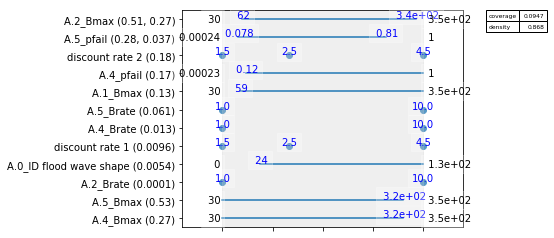

A.2_Brate [1.0, 10.0, 1.5]
A.4_Brate [1.0, 10.0, 1.5]
A.5_Brate [10.0, 1.0, 1.5]
discount rate 1 [1.5, 2.5, 4.5, 3.5]
discount rate 2 [1.5, 2.5, 4.5, 3.5]


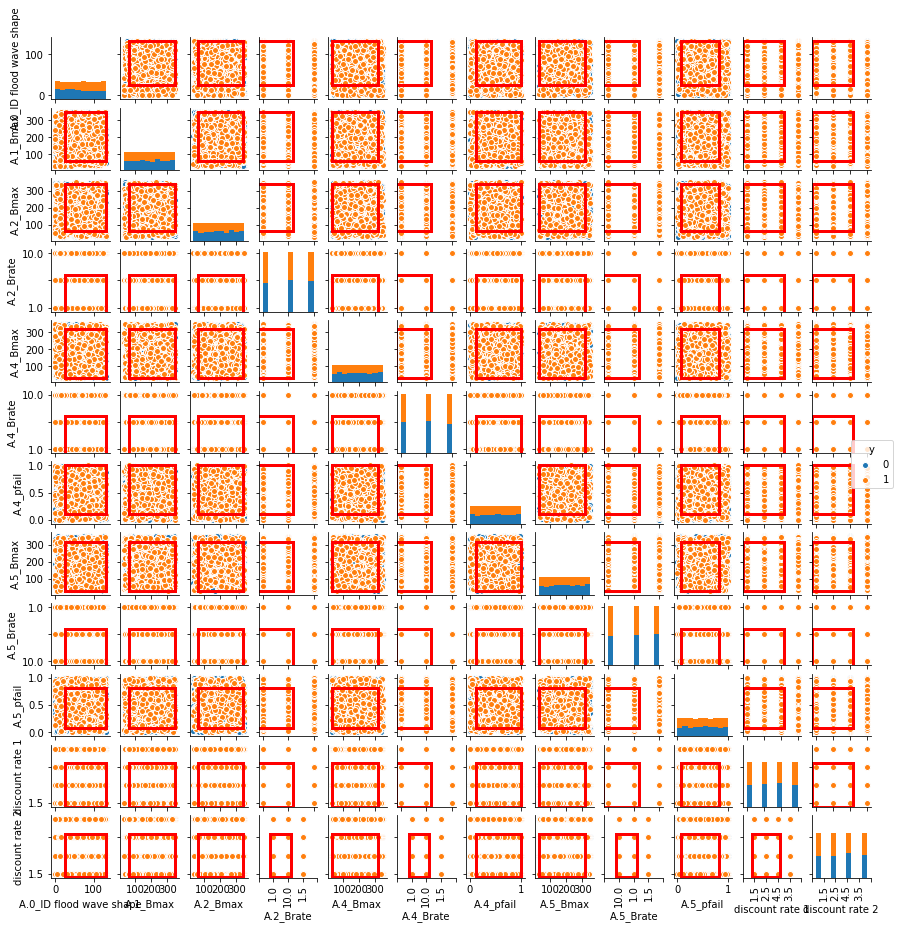

[MainProcess/INFO] 1000 points remaining, containing 502 cases of interest


In [ ]:
prim_analysis(diff_policies)